<a href="https://colab.research.google.com/github/ayinam-alekhya/Detection-Pneumonia-Tuberculosis/blob/main/MajorPro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os,glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import tensorflow as tf

from cv2 import imshow
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

['/content/drive/MyDrive/datasetZ/NORMAL/IM-0528-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0539-0001-0002.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0549-0001-0002.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0546-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0533-0001-0002.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0530-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0529-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0545-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0544-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0535-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0531-0001-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0539-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0543-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0545-0001-0001.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0545-0001-0002.jpeg', '/content/drive/MyDrive/datasetZ/NORMAL/IM-0551-0001-0001.jpeg', '/co

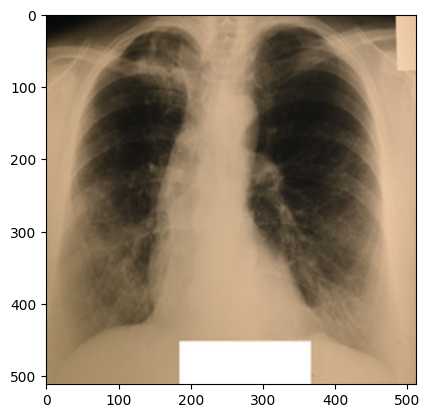

In [ ]:
from imutils import paths
b='/content/drive/MyDrive/datasetZ'
file_paths=list(paths.list_images(b))
print(file_paths)
a=cv2.imread('/content/drive/MyDrive/datasetZ/TB/Tuberculosis-1.png')
plt.imshow(a)
print (len(file_paths))

In [ ]:
def get_label(path:str) -> str:
  return path.split("/")[-2]

labels = list(map(lambda x : get_label(x) , file_paths))
print(labels)
print(len(labels))

['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',

In [ ]:
file_path=pd.Series(file_paths,name='Filepath').astype(str)
labels=pd.Series(labels,name='Label')
data=pd.concat([file_path,labels],axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/drive/MyDrive/datasetZ/PNEUMONIA/PNEU...,PNEUMONIA
1,/content/drive/MyDrive/datasetZ/PNEUMONIA/PNEU...,PNEUMONIA
2,/content/drive/MyDrive/datasetZ/NORMAL/NORMAL2...,NORMAL
3,/content/drive/MyDrive/datasetZ/NORMAL/IM-0528...,NORMAL
4,/content/drive/MyDrive/datasetZ/NORMAL/NORMAL2...,NORMAL


(array([0, 1, 2]),
 [Text(0, 0, 'PNEUMONIA'), Text(1, 0, 'NORMAL'), Text(2, 0, 'TB')])

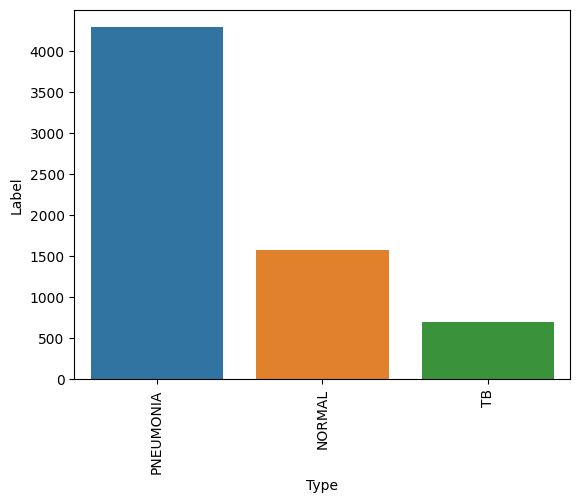

In [ ]:
counts=data.Label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

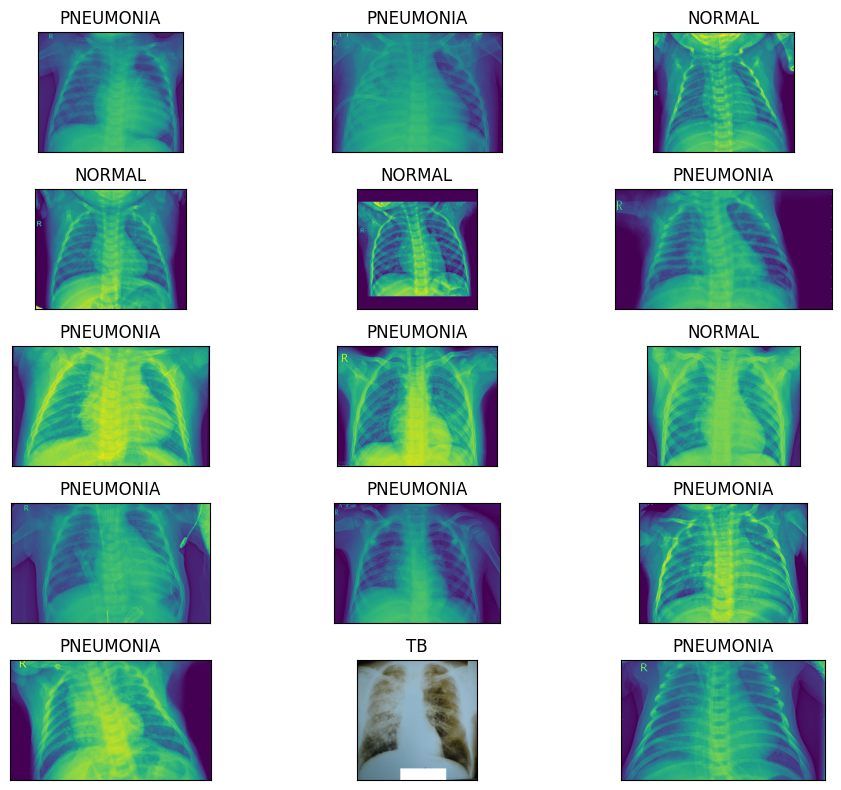

In [ ]:
fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(10,8),subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
  ax.imshow(plt.imread(data.Filepath[i]))
  ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train,test=train_test_split(data,test_size=0.25,random_state=42)

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen=train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(227,227),
    class_mode ='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
val_gen=train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(227,227),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen=train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(227,227),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 4920 validated image filenames belonging to 3 classes.
Found 1640 validated image filenames belonging to 3 classes.
Found 1640 validated image filenames belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
pretrained_model=ResNet50(
    input_shape=(227,227,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable=False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)
outputs=Dense(3,activation='softmax')(x)
model=Model(inputs=inputs,outputs=outputs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                            min_delta=0,
                            patience=3,
                            mode='auto')]

In [ ]:
history=model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=my_callbacks
)

Epoch 1/10
154/154 [==============================] - 3646s 24s/step - loss: 0.1765 - accuracy: 0.9331 - val_loss: 0.0996 - val_accuracy: 0.9628
Epoch 2/10
154/154 [==============================] - 1636s 11s/step - loss: 0.0957 - accuracy: 0.9636 - val_loss: 0.1009 - val_accuracy: 0.9677
Epoch 3/10
154/154 [==============================] - 1619s 11s/step - loss: 0.0956 - accuracy: 0.9622 - val_loss: 0.0909 - val_accuracy: 0.9659
Epoch 4/10
154/154 [==============================] - 1609s 10s/step - loss: 0.0660 - accuracy: 0.9770 - val_loss: 0.0898 - val_accuracy: 0.9634
Epoch 5/10
154/154 [==============================] - 1617s 11s/step - loss: 0.0664 - accuracy: 0.9746 - val_loss: 0.1165 - val_accuracy: 0.9659


In [ ]:
model.save('ResNet50.h5')

<Figure size 360x216 with 0 Axes>

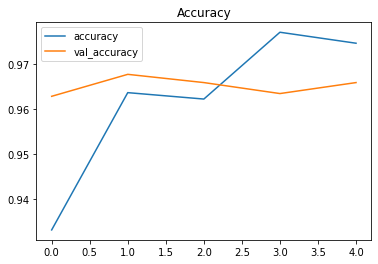

<Figure size 504x216 with 0 Axes>

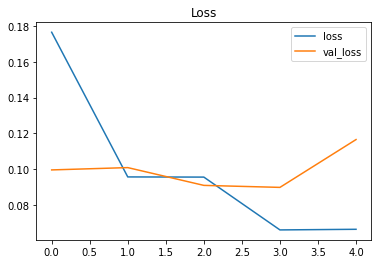

In [ ]:
plt.figure(figsize=(5,3))
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.show()
print()
plt.figure(figsize=(7,3))
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.show()

In [ ]:
results=model.evaluate(test_gen,verbose=0)

print('Test Loss: {:.5f}'.format(results[0]))
print('Test Accuracy: {:.2f}'.format(results[1]*100))

Test Loss: 0.11654
Test Accuracy: 96.59


In [ ]:
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]
print(pred)
print(len(pred))

52/52 [==============================] - 401s 8s/step
['NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'TB', 'TB', 'TB', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'TB', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'TB', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'TB', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'TB', 'TB', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEU

In [ ]:
pred_label=[]
pred_label.extend(list(test.get('Label')))
print(pred_label)
for i in range(len(pred_label)):
  if(pred_label[i]=='PNEUMONIA'):
    pred_label[i]=1
  elif(pred_label[i]=='NORMAL'):
    pred_label[i]=0
  else:
    pred_label[i]=2
print(pred_label)

['NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'TB', 'TB', 'TB', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'TB', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'TB', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'TB', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'TB', 'TB', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 

In [ ]:
pred_labels=[]
pred_labels.extend(pred)
print(pred_labels)
for i in range(len(pred_labels)):
  if(pred_labels[i]=='PNEUMONIA'):
    pred_labels[i]=1
  else:
    pred_labels[i]=0
print(pred_labels)
print(len(pred_labels))

['NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'TB', 'TB', 'TB', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'TB', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'TB', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'TB', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'TB', 'TB', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMO

In [ ]:
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      NORMAL       0.98      0.88      0.93       405
   PNEUMONIA       0.96      0.99      0.97      1080
          TB       1.00      1.00      1.00       155

    accuracy                           0.97      1640
   macro avg       0.98      0.96      0.97      1640
weighted avg       0.97      0.97      0.97      1640



In [ ]:
class estimator:
    _estimator_type = ''
    classes_=['NORMAL','PNEUMONIA','TUBERCULOSIS']
    def __init__(self, model):
        self.model = model
        self._estimator_type = 'classifier'
        #self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        return np.argmax(y_prob, axis=1)

classifier = estimator(model)

In [ ]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(12,8),
                      subplot_kw={'xticks':[],'yticks':[]})
for i ,ax in enumerate(axes.flat):
  ax.imshow(plt.imread(test.Filepath.iloc[i]))
  ax.set_title(f"True:{test.Label.iloc[i]}\nPredicted:{pred[i]}")
plt.tight_layout()
plt.show()

(227, 227, 3)
1/1 [==============================] - 0s 230ms/step
[[ 0 99  0]]


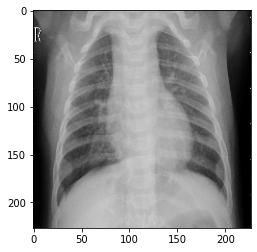

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path='/content/drive/MyDrive/datasetZ/PNEUMONIA/PNEUMONIA/person1000_virus_1681.jpeg'
img=cv2.imread(img_path)
img=cv2.resize(img,(227,227))
plt.imshow(img)
print(img.shape)

x=np.expand_dims(img,axis=0)
x=preprocess_input(x)
result=model.predict(x)
print((result*100).astype('int'))

In [ ]:
l=((result*100).astype('int')).tolist()
i=l[0].index(max(l[0]))
if(i==0):
  print('NORMAL')
elif(i==1):
  print('PNEUMONIA')
else:
  print('TUBERCULOSIS')

TUBERCULOSIS
